### This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:
Store - the store number,
Date - the week of sales,
Weekly_Sales - sales for the given store,
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week,
Temperature - Temperature on the day of sale,
Fuel_Price - Cost of fuel in the region,
CPI – Prevailing consumer price index,
Unemployment - Prevailing unemployment rate,
Holiday Events.

### Step 1: Import Liabraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score



In [4]:
import os
os.chdir('Desktop')

In [5]:
data = pd.read_csv('Walmart.csv')

In [6]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.shape

(6435, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<AxesSubplot:>

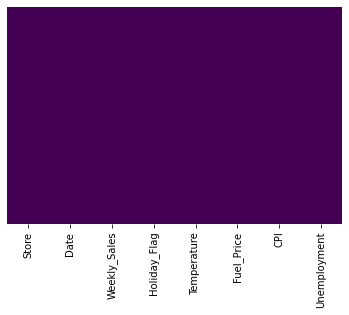

In [9]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

We don't have any null values in the dataset

### Step2 : Exploratory Data Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_12732\3090804475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))


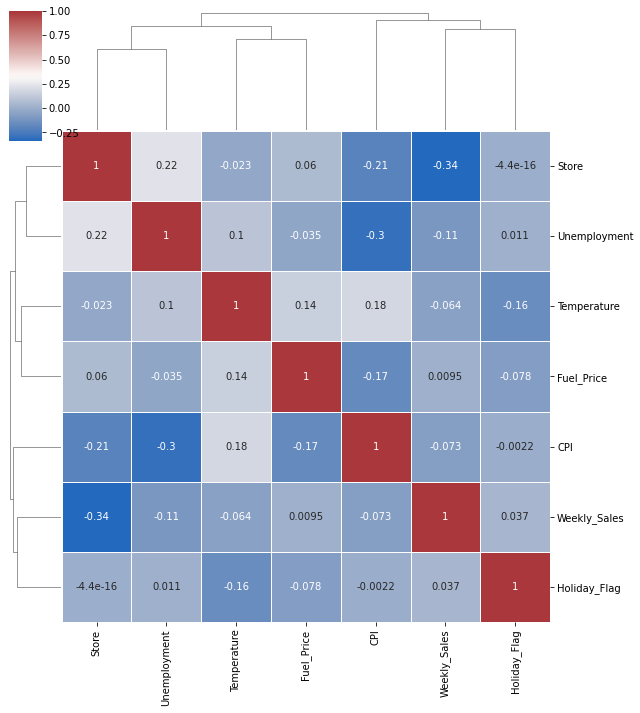

In [10]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['year'].unique().astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14984\3349774379.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


array([2010, 2011, 2012])

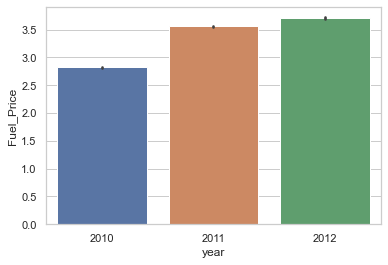

In [10]:
sns.set_theme(style='whitegrid')
tips=data
ax = sns.barplot(x='year',y='Fuel_Price',data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

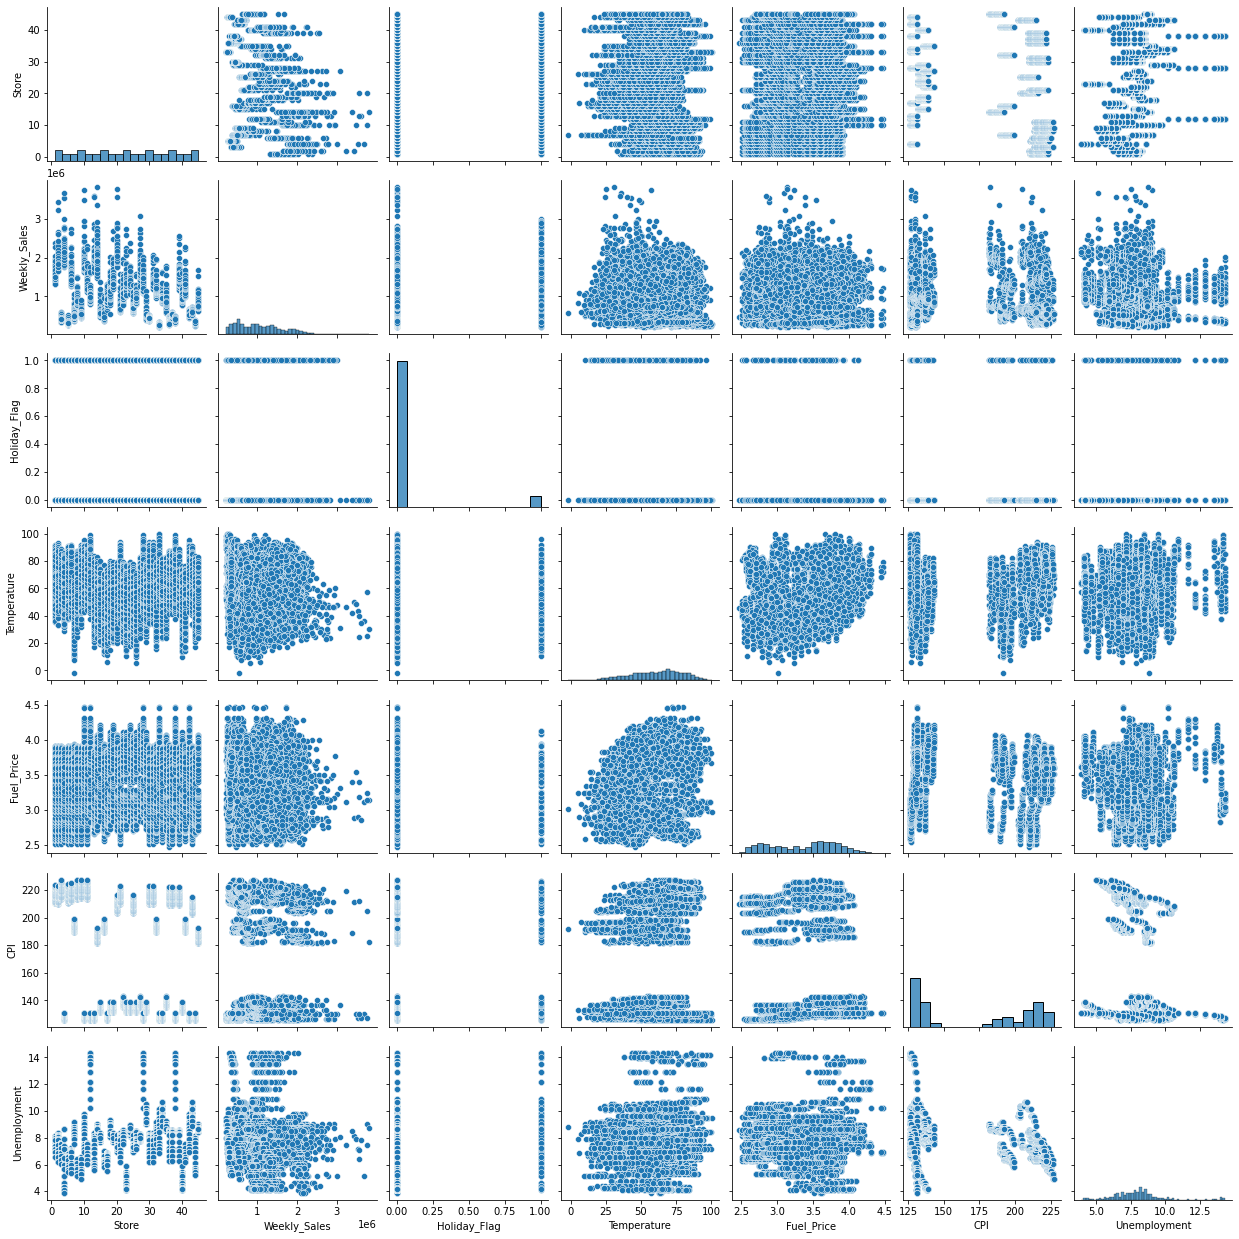

In [11]:
sns.pairplot(data)

<AxesSubplot:xlabel='Unemployment', ylabel='count'>

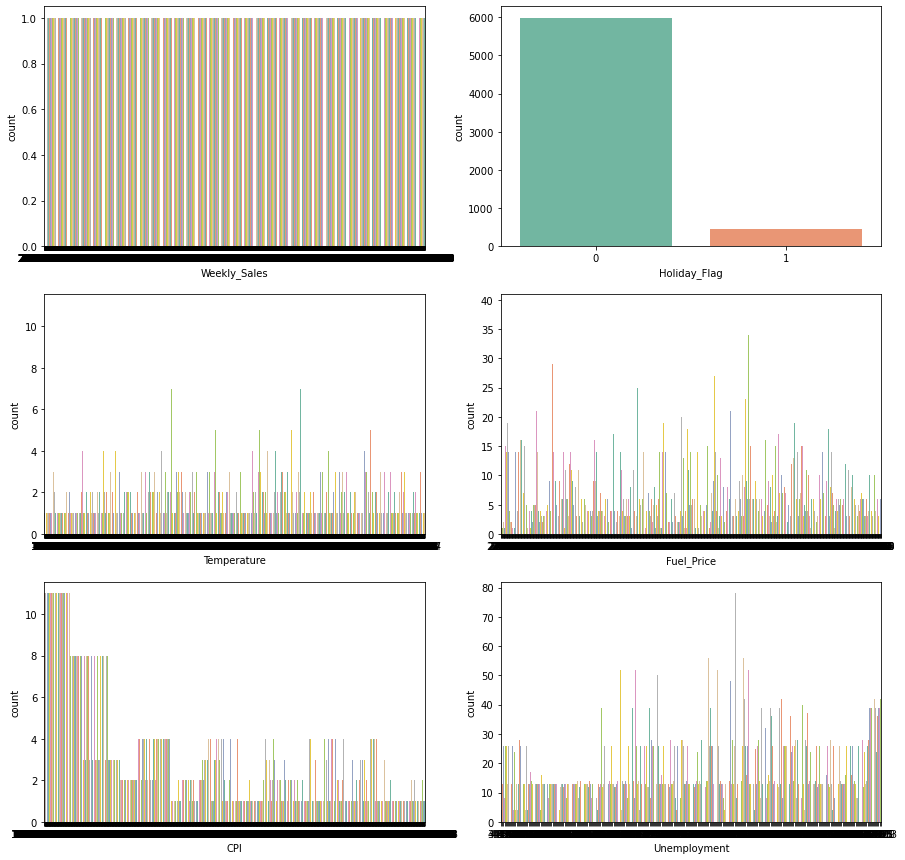

In [12]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Weekly_Sales', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'Holiday_Flag', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'Temperature', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'Fuel_Price', palette = 'Set2', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'CPI', palette = 'Set2', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'Unemployment', palette = 'Set2', data = data)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='count'>

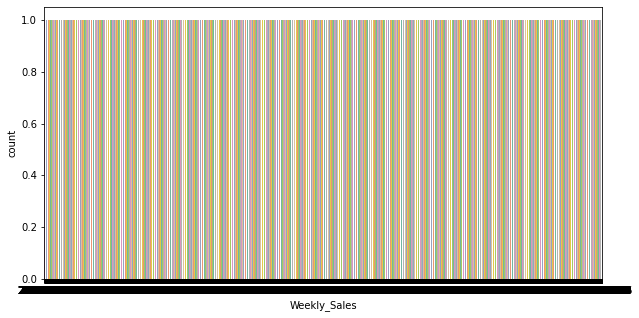

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Weekly_Sales', palette = 'Set2', data = data)

Based on above chart we cannot make any predictions so let's explore more in this

<AxesSubplot:xlabel='Store'>

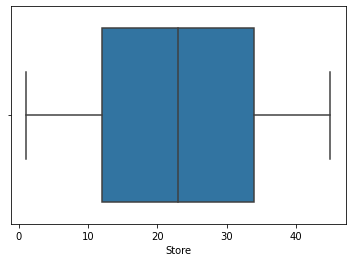

In [14]:
sns.boxplot(x=data["Store"])

<AxesSubplot:xlabel='Weekly_Sales'>

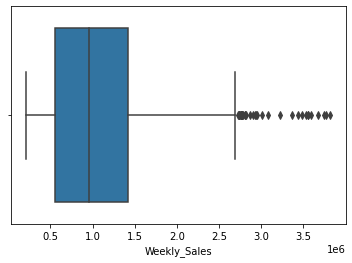

In [15]:
sns.boxplot(x=data["Weekly_Sales"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature'>

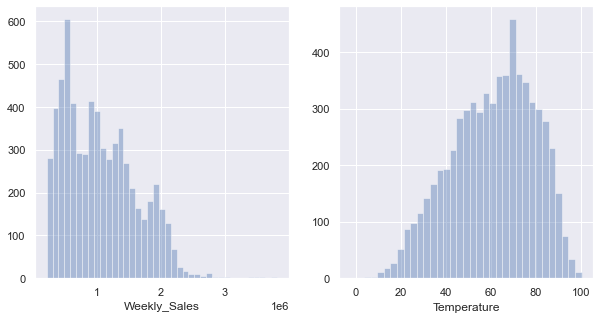

In [16]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['Weekly_Sales'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['Temperature'], kde = False)

<AxesSubplot:xlabel='Store'>

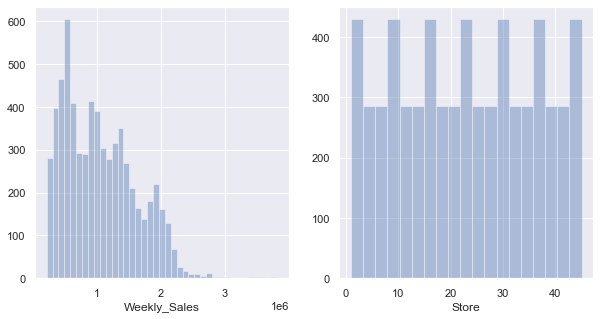

In [17]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['Weekly_Sales'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['Store'], kde = False)

<AxesSubplot:xlabel='Holiday_Flag'>

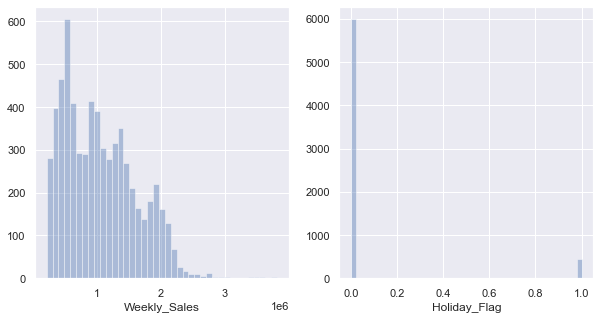

In [18]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['Weekly_Sales'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['Holiday_Flag'], kde = False)

<AxesSubplot:xlabel='Unemployment'>

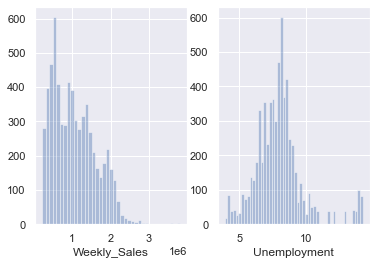

In [19]:
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['Weekly_Sales'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['Unemployment'], kde = False)

<AxesSubplot:xlabel='Fuel_Price'>

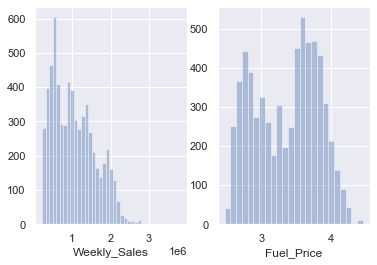

In [20]:
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['Weekly_Sales'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['Fuel_Price'], kde = False)

<AxesSubplot:xlabel='CPI'>

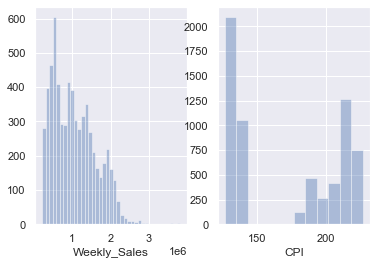

In [21]:
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['Weekly_Sales'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['CPI'], kde = False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


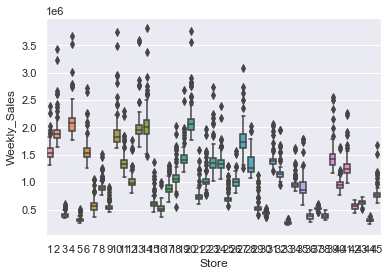

In [22]:
sns.boxplot(data.Store, data.Weekly_Sales)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


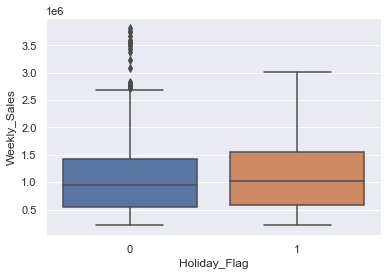

In [23]:
sns.boxplot(data.Holiday_Flag, data.Weekly_Sales)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


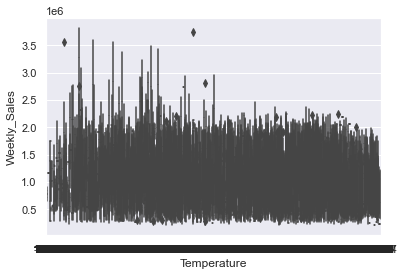

In [24]:
sns.boxplot(data.Temperature, data.Weekly_Sales)
plt.show()

In [25]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['year'].unique().astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12732\3349774379.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


array([2010, 2011, 2012])

 Top 10 Store by weekly sales 2010


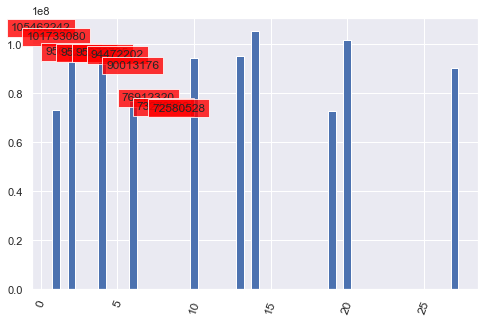

 Top 10 Store by weekly sales 2011


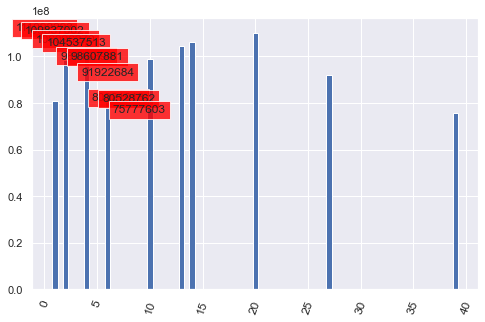

 Top 10 Store by weekly sales 2012


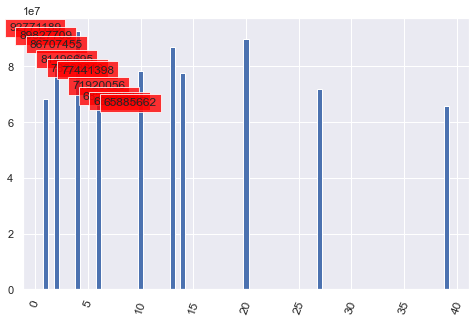

 Top 10 stores by weekly sales in the three years


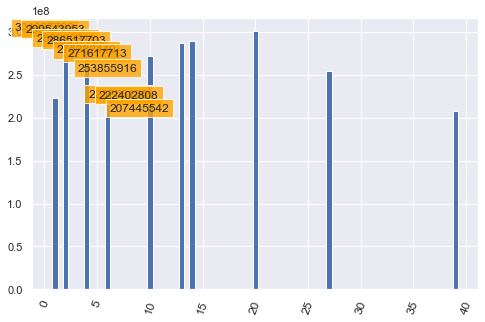

In [26]:
years = data['year'].unique()
for year in years:
    top_10 = data[data['year'] == year]
    top_10 = top_10.groupby('Store')['Weekly_Sales'].sum().nlargest(10)
    x = top_10.index
    y = top_10.values.astype(int)
    print('\033[1m','Top 10 Store by weekly sales',year)
    plt.subplots(figsize=(8,5))
    plt.bar(x, y, width=.5)
    plt.xticks(rotation = 70,fontsize=12)
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',bbox = dict(facecolor = 'red', alpha =.8))
    plt.show();

top_10 = data.groupby('Store')['Weekly_Sales'].sum().nlargest(10)
x = top_10.index
y = top_10.values.astype(int)
print('\033[1m','Top 10 stores by weekly sales in the three years')
plt.subplots(figsize=(8,5))
plt.bar(x, y, width=.5)
plt.xticks(rotation = 70,fontsize=12)
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha = 'center',bbox = dict(facecolor = 'orange', alpha =.8))
plt.show();

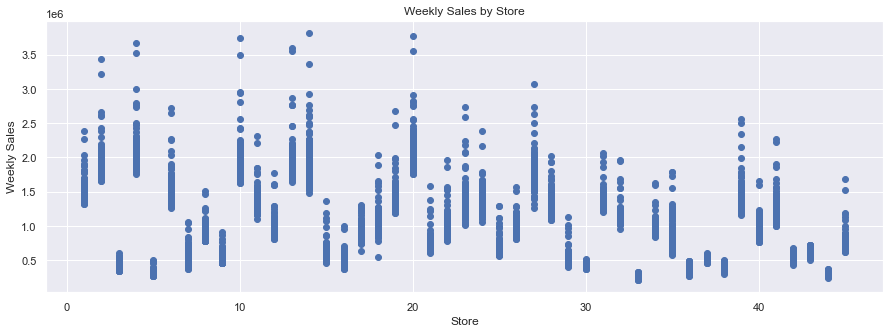

In [27]:
x = data['Store']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

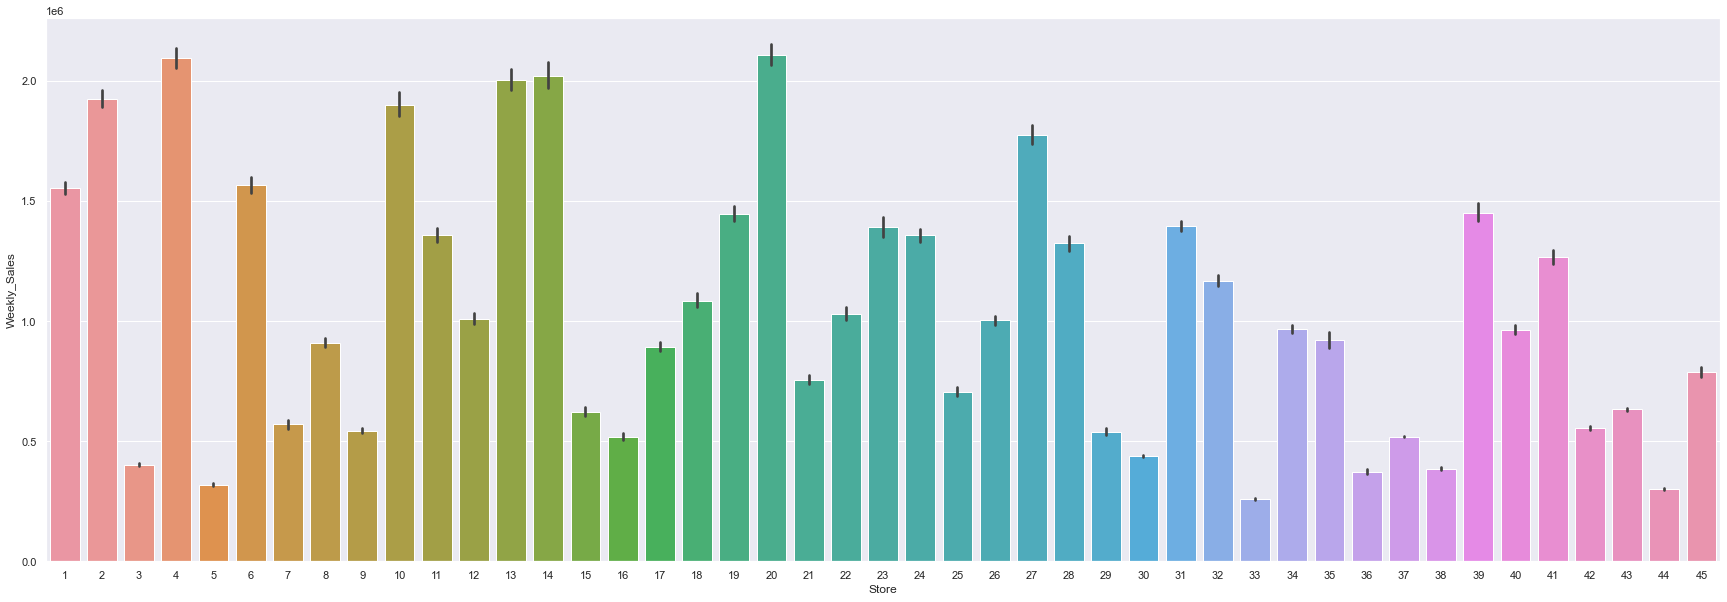

In [28]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data)